# Preparing for Your Proposal 
 


## Which client/dataset did you select and why? 



Client 3: SportsStats (Olympics Dataset - 120 years of data) 
SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide 	“interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain 	groups/events/countries, etc. for the purpose of developing a news story or discovering key health 	insights. 

I selected SportsStats client, because of two reasons: 

1) the size of the SportsStats data is smaller than the others. This makes data wrangling and analysis 	easier; 2) I am interested in sports and working with sports analytics 



## Describe the steps you took to import and clean the data. 
 

To import the data, I used pandas to read the CSV files. I used in-built pandas to_sql() to store the 	data in MySQL dataset.  I did not clean the data because the dataset has NaN values. 

## Importing the data

In [1]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

athlete_events = pd.read_csv("athlete_events.csv")
noc_regions = pd.read_csv("noc_regions.csv")


Aftering importing the data, the next step is to dividie the athelte_events table into winter and summer tables. "Team", "Games", "Season", and "City" columns are not selected, since they provide us with either repetiitive or unnecessary information:

In [2]:
summer_events = pysqldf('''SELECT
                             ID,
                             Name,
                             Sex,
                             Age,
                             Height,
                             Weight,
                             NOC,
                             Year,
                             Sport,
                             Event,
                             Medal
                           FROM
                             athlete_events
                           WHERE
                             Season = "Summer"''')

winter_events = pysqldf('''SELECT
                             ID,
                             Name,
                             Sex,
                             Age,
                             Height,
                             Weight,
                             NOC,
                             Year,
                             Sport,
                             Event,
                             Medal
                           FROM
                             athlete_events
                           WHERE
                             Season = "Winter"''')

## Initial exploration of the data

Out of 271116 data points, 9474 lack age value, 60171 lack height value, 62875 lack weight value. Sex values are complete. Games data and its attributes (year, city, etc.) are complete.Since team names can be changed, using NOC instead would prove more consistent.

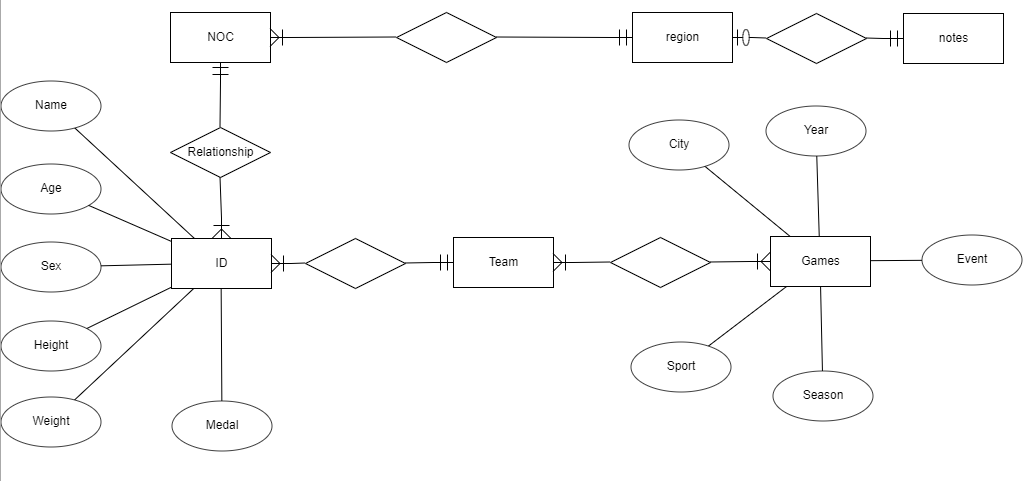

In [3]:
from IPython.display import Image
Image(filename = "ERD.png", width = 800, height = 400)

## Project Proposal

In this project, I would analyze the summer and winter Olympic games data. I try to figure out important changes in terms of diversity and performance. I also try to find correlation between several factors (such as representing the host country) and team performance. This would be beneficial to anyone interested in understanding the demographics of Olympic games.

## Questions

Q1:  Is there any correlation between the performance of a country in winter olympics and that in summer olympics?<br>
Q2: Does country performance by year change more in Winter Olympics or Summer Olympics?<br>
Q3: How has the male:female ratio evolved through time?

## Hypotheses

H1: Yes.<br>
H2: Winter Olympics.<br>
H3: Decreased.

## Approach

A1: to calculate the Pearon correlation coefficient. <br>
A2:  to calculate the standard deviation in country performance through years.  A Comparison between average std of Winter and that of  Summer Olympics will help.<br>
A3:  to draw a simple histogram.